In [1]:
"""cluster_create.ipynb is used to create a cluster dataset having the following functionalities : 
1) Can create k clusters of equal size
2) Can create k clusters of unequal size
note: everything here is done for 2 dimensions for visualisation purposes but can be done for more dimensions as well"""

'cluster_create.ipynb is used to create a cluster dataset having the following functionalities : \n1) Can create k clusters of equal size\n2) Can create k clusters of unequal size\nnote: everything here is done for 2 dimensions for visualisation purposes but can be done for more dimensions as well'

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [3]:
def generate_random(dataframe, cluster_number, n_points = 100, centre = (0,0), radius = 10):

    """
        desc: this function returns list of random points ditributed uniformly within a circle.

        dataframe : (pandas dataframe) The dataframe onto which we will add our cluster
        cluster_number : (int) the index of the cluster which we will be adding to our dataframe
        n_points : (int) The number of random points we want to sample from our uniform circle.
        centre : (tuple of int) The centre of the uniform circle from which we sample our data.
        radius : (int) The radius of the uniform circle from which we sample.

        returns : (dataframe) return the dataframe having our new cluster added.
    """

    for i in range(n_points):

        theta_rand = random.uniform(0,2*np.pi)
        r_rand = radius*np.sqrt(random.uniform(0,1))

        p = [0,0]

        p[0] = centre[0] + r_rand*np.cos(theta_rand)
        p[1] = centre[1] + r_rand*np.sin(theta_rand)

        dataframe.loc[len(dataframe.index)] = [p[0], p[1], cluster_number] 
    
    return dataframe

In [4]:
def distance(x,y,x2,y2):
    return np.sqrt((x-x2)**2 + (y-y2)**2)

In [5]:
class create_cluster_dataset:

    def __init__(self, num_clusters):
        """
        desc: We initialise some variables of create_cluster_dataset class.

        num_clusters : (int) The number of clusters we want in our dataset
        
        list_circ : (list) Empty list created to hold the tuple (centre_x,centre_y,radius) for each cluster
        
        returns : (None) No return.
        """
        self.num_clusters = num_clusters
        self.list_circ = []

    def add_clusters(self, same_radius = False, same_size = False):
        """
        desc: We assign self.list_circ with num_clusters amount of non overlapping cluster and add all cluster to our dataframe.

        same_radius : (bool) Boolean flag to say whether our circles have same radius or not.
        same_size : (bool) Boolean flag to say whether number of each points in each cluster are same or not.
        
        returns : (pandas dataframe) return the final dataframe storing all the points of each cluster.
        NOTE : This is a random algorithm and hence may take variable time to compute.
        """

        while len(self.list_circ)<self.num_clusters:

            r = np.random.randint(10,40)
            if same_radius:
                r = 15
            x = np.random.randint(-200,200)
            y = np.random.randint(-200,200)

            if len(self.list_circ) == 0:
                self.list_circ.append((x,y,r))
                continue

            else:
                b = True
                for i in self.list_circ:
                    d = distance(x,y,i[0],i[1])
                    if d < r + i[2]:
                        b = False
                        break
                if(b):
                    self.list_circ.append((x,y,r))

        df = pd.DataFrame(columns=['X','Y','cluster_number'])

        for j in range(len(self.list_circ)):
            n_points = np.random.randint(100,250)
            if same_size:
                n_points = 150
            i = self.list_circ[j]
            df = generate_random(df,j,n_points,(i[0],i[1]),i[2])
            
        return df

    def randomise_dataset(self, dataframe):
        """
        desc : Shuffles the dataframe rows which contain points belonging to different clusters.

        dataframe : (pandas dataframe) The dataframe which contains points belonging to different clusters.

        return : (pandas dataframe) returns the new shuffled dataframe.
        """
        dataframe = dataframe.sample(frac = 1).reset_index(drop=True)
        return dataframe

    def create_dataset(self, same_radius = False, same_size = False):
        """
        desc: We create our cluster dataset and shuffle the rows.

        same_radius : (bool) Boolean flag to say whether our circles have same radius or not.
        same_size : (bool) Boolean flag to say whether number of each points in each cluster are same or not.

        returns : (pandas dataframe) return the final dataframe storing all the points of each cluster.
        """

        df = self.add_clusters(same_radius=same_radius,same_size=same_size)
        df = self.randomise_dataset(df)
        return df

    def plot_clusters(self, dataframe):
        """
        desc : This plots a graph of all the clusters in different colours.

        dataframe : (pandas dataframe) The dataframe which contains points belonging to different clusters.

        return : (None).
        """

        df = dataframe.groupby('cluster_number')

        for i in range(self.num_clusters):
            t = df.get_group(i)
            x = t['X']
            y = t['Y']
            plt.scatter(x,y,s=1)
        plt.show()

In [6]:
c = create_cluster_dataset(10)
df = c.create_dataset(same_radius=False,same_size=False)

10
[(-99, 188, 29), (-197, 33, 16), (-9, 32, 28), (86, -117, 22), (183, 193, 17), (193, -54, 32), (87, 93, 20), (53, -52, 39), (81, 31, 11), (33, -121, 27)]


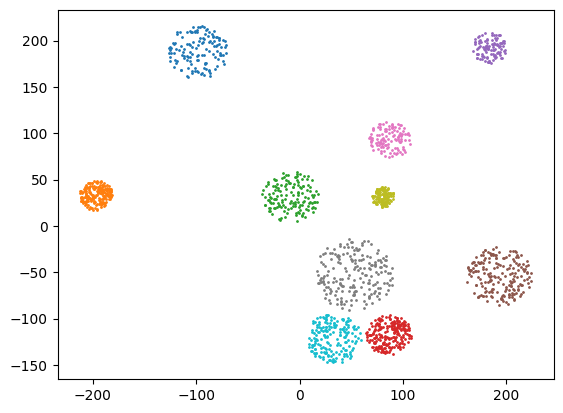

In [7]:
df.to_csv('cluster.csv', index=False )
print(c.num_clusters)
print(c.list_circ)
c.plot_clusters(df)